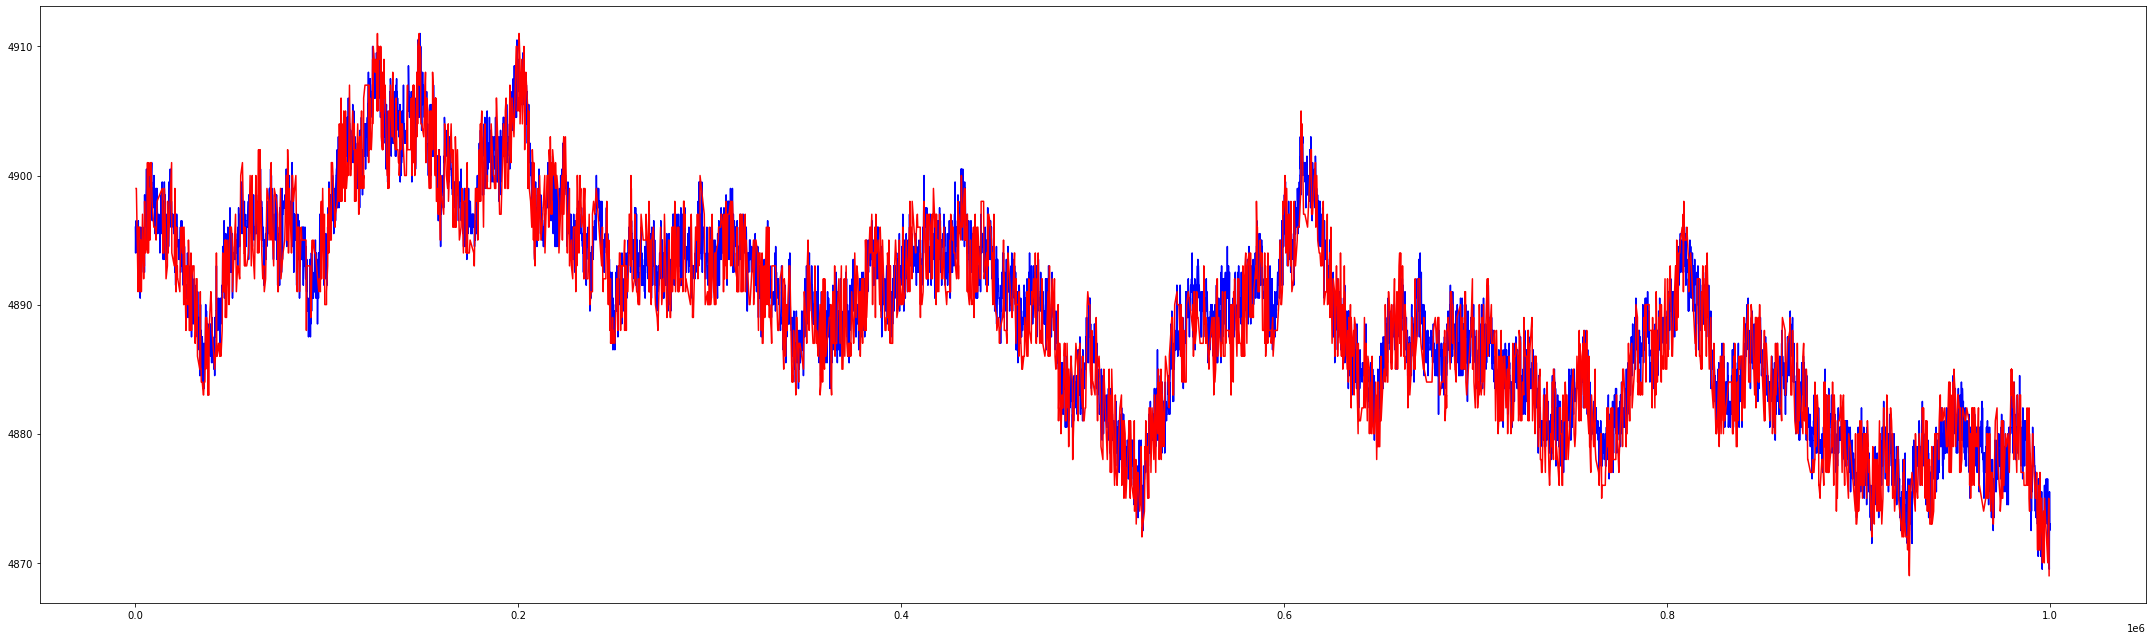

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
day = 0
path = f"island-data-bottle-round-1/prices_round_1_day_{day}.csv"
path_nn = f"island-data-bottle-round-1/trades_round_1_day_{day}_nn.csv"
df = pd.read_csv(path, sep=';')
df_nn = pd.read_csv(path_nn, sep=';')

bananas = df[df['product']=="BANANAS"].reset_index(drop=True).fillna(0)
bananas_nn = df_nn[df_nn['symbol'] =="BANANAS"].reset_index(drop=True).fillna(0)
price = df_nn[df_nn['symbol']=="BANANAS"]['price'].reset_index(drop=True).fillna(0)
qnt = df_nn[df_nn['symbol'] == "BANANAS"]['quantity'].reset_index(drop=True).fillna(0)


bananas['bid_volume'] = bananas['bid_volume_1'] + bananas['bid_volume_2'] + bananas['bid_volume_3']
bananas['ask_volume'] = bananas['ask_volume_1'] + bananas['ask_volume_2'] + bananas['ask_volume_3']

plt.rcParams["figure.figsize"] = [30, 9]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

"""
for idx, price in enumerate(bananas['mid_price']):
    if idx == len(bananas['mid_price'][4000:6000])-1: break

    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='r')
    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='b')
    else:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='g')
"""
ax.plot(bananas['timestamp'], bananas['mid_price'], c='b')
ax.plot(bananas_nn['timestamp'], price, c='r')

# ax2 = ax.twinx()
# ax2.plot(range(99),bananas['bid_volume'][1:]-bananas['ask_volume'][1:], c='y')
# ax2.set_ylim(-20,70)
plt.show()




In [93]:
correct = 0
incorrect = 0
unsure = 0
for idx, price in enumerate(bananas['mid_price']):
    if idx == len(bananas['mid_price'])-1:
        break
    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:
        if bananas['mid_price'][idx+1] - bananas['mid_price'][idx] <= 0:
            correct+=1
        else: incorrect+=1
    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:
        unsure +=1
    else:
        if bananas['mid_price'][idx+1] - bananas['mid_price'][idx] >= 0:
            correct += 1
        else:
            incorrect += 1
        
print(f"Correct Percentage: {correct/(correct+incorrect+unsure)}")
print(f"Unsure Percentage: {incorrect/(correct+incorrect+unsure)}")
print(f"Incorrect Percentage: {unsure/(correct+incorrect+unsure)}")


Correct Percentage: 0.43844384438443845
Unsure Percentage: 0.0664066406640664
Incorrect Percentage: 0.4951495149514952


In [ ]:
df = pd.read_csv("tutorial/test_data_0.csv", sep=';')

pearls = df[df['product'] == "PEARLS"].reset_index(drop=True)
plt.figure(figsize=(18, 6))
plt.ylim(10000-5, 10000+5)
pearls['mid_price'].plot()


